# Lecture 7: Descriptive statistics with R: Part I - Quantitative variables
This lecture covers descriptive statistics and corresponding graphical representations for quantitative variables.
##### Descriptive statistics
- for the whole dataset
- for a single quantitative variable
- for quantitative variables by groups
- for two quantitative variables.

## 7.1 For the whole dataset

In [1]:
# ?ToothGrowth
tg <- ToothGrowth
rbind(head(tg, 3), tail(tg, 3))

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
58,27.3,OJ,2.0
59,29.4,OJ,2.0
60,23.0,OJ,2.0


In [2]:
# Check the dimension
dim(tg)

[1] 60  3

In [3]:
# Summary
summary(tg)
# Note the difference for categorical and numeric variables.

      len        supp         dose      
 Min.   : 4.20   OJ:30   Min.   :0.500  
 1st Qu.:13.07   VC:30   1st Qu.:0.500  
 Median :19.25           Median :1.000  
 Mean   :18.81           Mean   :1.167  
 3rd Qu.:25.27           3rd Qu.:2.000  
 Max.   :33.90           Max.   :2.000  

## 7.2 For a single quantitative variable
### 7.2.1 Numerical representation
##### A lot of statistics, such as,
mean, variance, standard deviation, median, minimum, maximum, range, quantiles, etc...

In [4]:
var(tg$len)

[1] 58.51202

$Var(x)$ in R calculates the variance of the sample $x$ - sample variance thus denominator is $n-1$.

$Var(\boldsymbol{x})=\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2$

In [5]:
n.sample = dim(tg)[1]
sum((tg$len - mean(tg$len))^2)/(n.sample - 1)

[1] 58.51202

### 7.2.2 Graphical representation
Check the overall distribution. Check normality in many cases.
#### i. Histogram

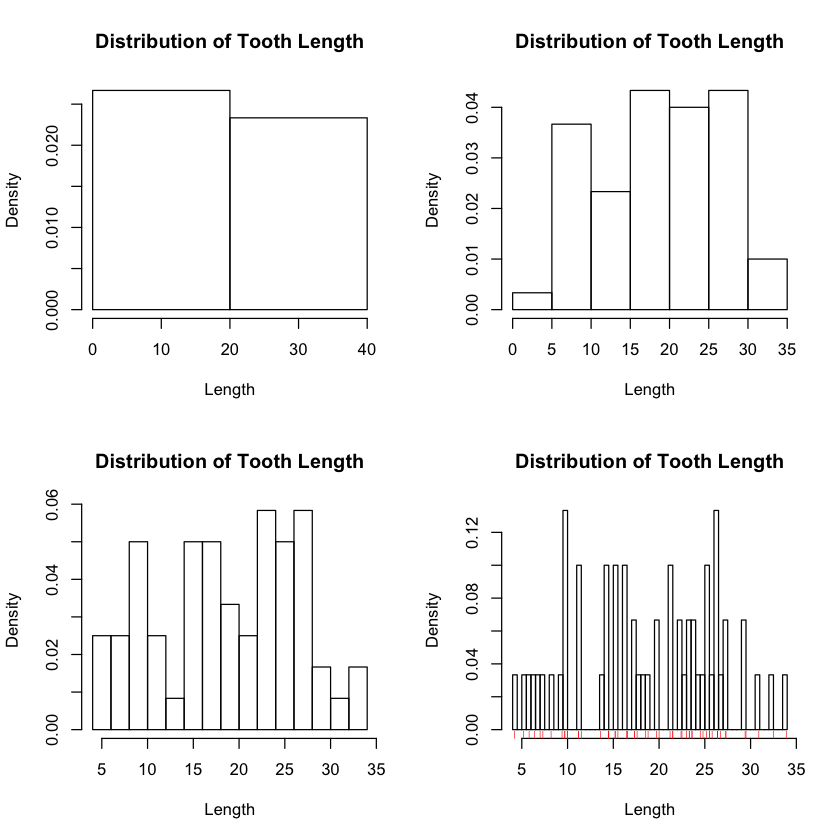

In [6]:
par(mfrow=c(2 ,2))
hist(tg$len,
     main = "Distribution of Tooth Length",
     xlab = "Length",
     freq = F,   # F gives probability, T gives count
     breaks = 2) # Number of bars
hist(tg$len,
     main = "Distribution of Tooth Length",
     xlab = "Length",
     freq = F,
     breaks = 5)
hist(tg$len,
     main = "Distribution of Tooth Length",
     xlab = "Length",
     freq = F,
     breaks = 20)
hist(tg$len,
     main = "Distribution of Tooth Length",
     xlab = "Length",
     freq = F,
     breaks = 100)
rug(tg$len, col = "red")# Add ticks at the data points on the x axis.

# Is the distribution normal?
# See how different number of bins can affect our arbitrary judgement of the distribution.

#### ii. Kernel density*
Non-parametric statistics

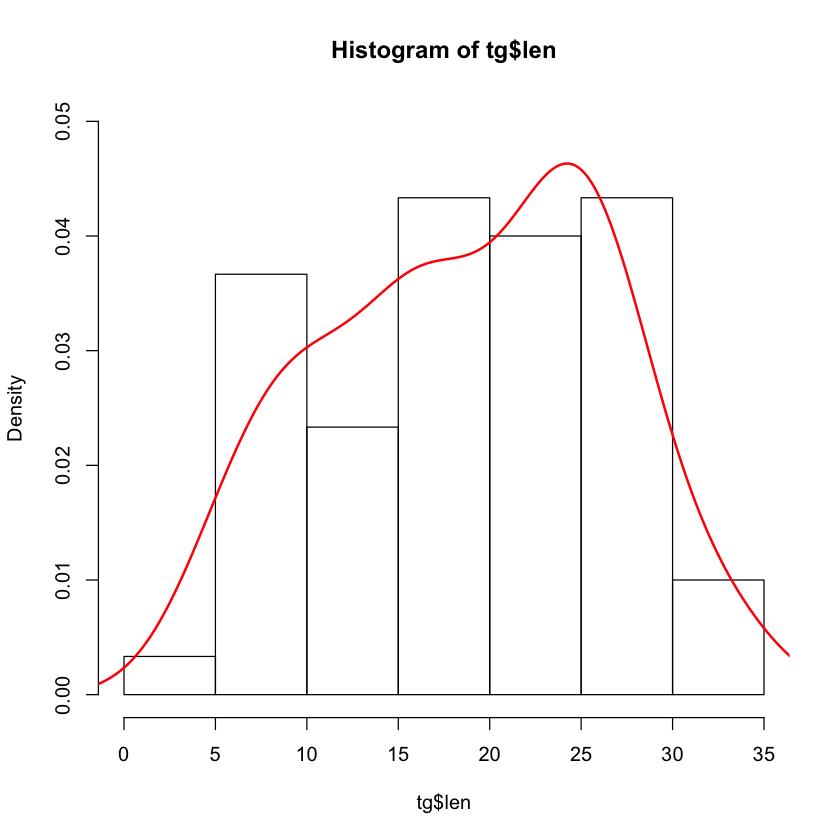

In [7]:
hist(tg$len, freq = F, ylim = c(0, 0.05))
lines(density(tg$len), col = "red", lwd = 2)

#### iii. Boxplot
Detect outliers

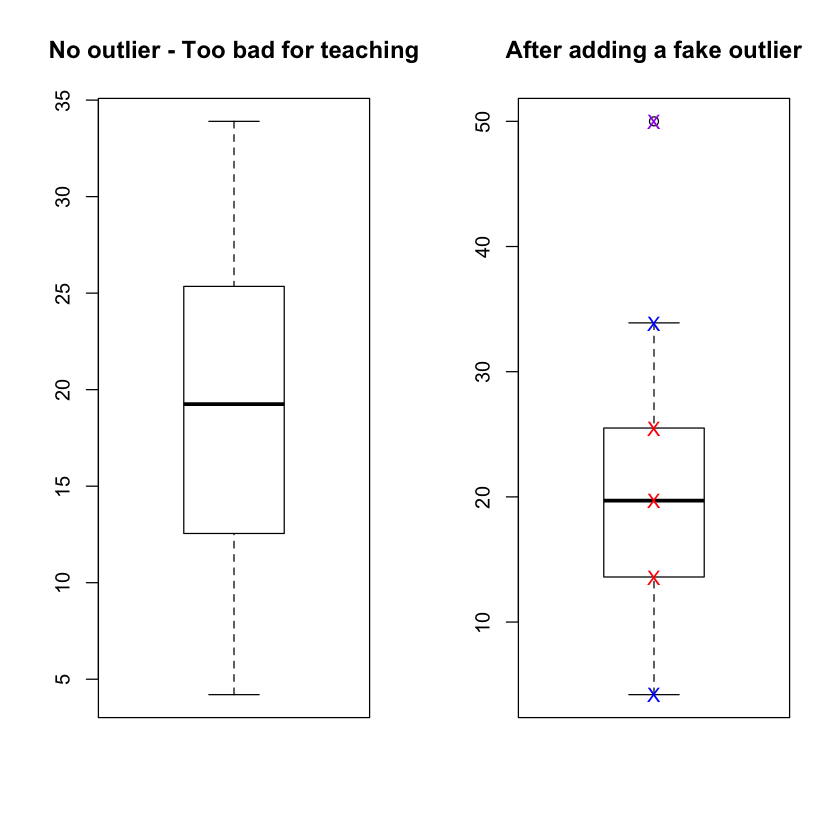

In [8]:
par(mfrow = c(1, 2))
boxplot(tg$len, main = "No outlier - Too bad for teaching")
fake.len <- c(tg$len, 50)
boxplot(fake.len, main = "After adding a fake outlier")
points(x = rep(1,3), quantile(fake.len, seq(0.25, 0.75, 0.25)), pch = "X", col = "red")
points(x=rep(1,2), c(min(tg$len), max(tg$len)), pch = "X", col = "blue")
points(x=1, max(fake.len), pch = "X", col = "purple")
# Box: IQR - 25th and 75th quantile
# Whiskers: the lowest datum still within 1.5 IQR of the lower quartile,
# and the highest datum still within 1.5 IQR of the upper quartile

#### iv. Empirical CDF*
The empirical cumulative distribution function. Again non-parametric statistics.

$$ \hat{F}_n(t)=\frac{1}{n}\sum_{i=1}^n \mathbf{1}_{(x_i\leq t)} $$

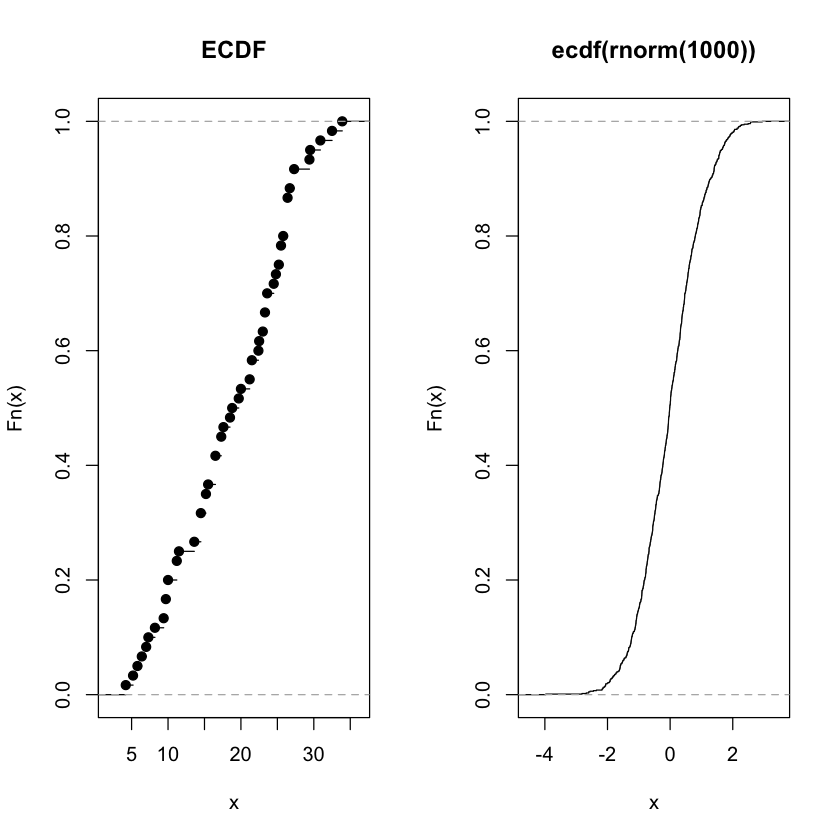

In [9]:
set.seed(613)
par(mfrow = c(1,2))
plot(ecdf(tg$len), main = "ECDF")
plot(ecdf(rnorm(1000)))

#### v. Q-Q Plot
quantile-quantile plot

Normal Q-Q plot checks normality.

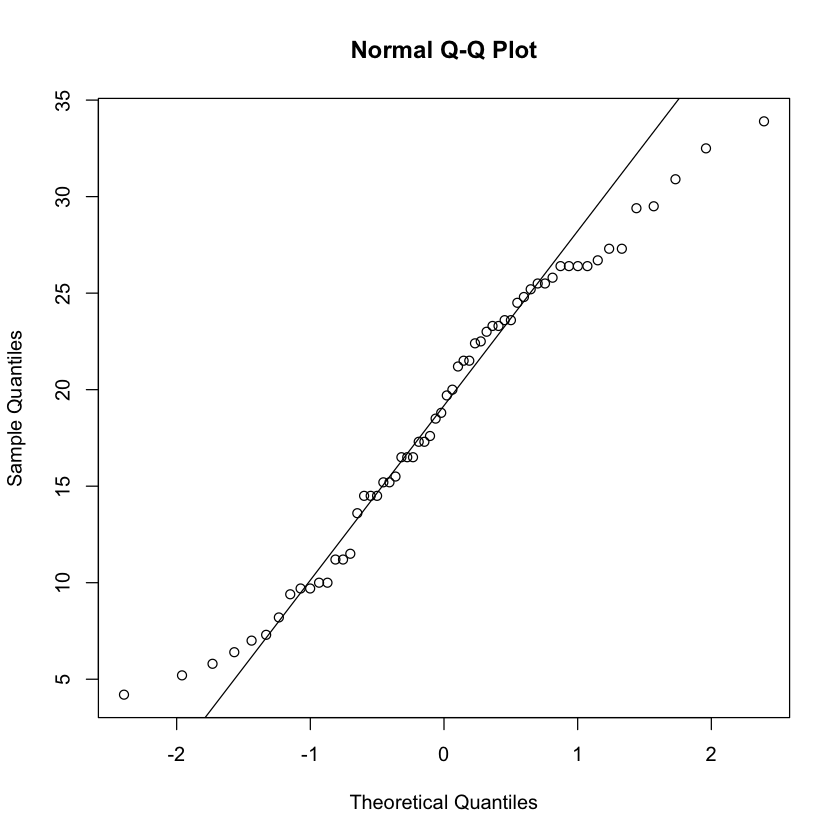

In [10]:
qqnorm(tg$len)
qqline(tg$len)

## 7.3 For quantitative variables by groups
### 7.3.1 Numerical representation
The following three functions are closely related.
        - aggregate()
        - tapply()
        - by()

In ToothGrowth dataset, there are 2 different supp, 3 different dose, mean length in all 6 categories.
##### When the result of your function (FUN) is 1D.

In [11]:
# recall aggregate( )
aggregate(len~., data = tg, FUN = mean)

supp,dose,len
<fct>,<dbl>,<dbl>
OJ,0.5,13.23
VC,0.5,7.98
OJ,1.0,22.70
VC,1.0,16.77
OJ,2.0,26.06
VC,2.0,26.14


In [12]:
tapply(tg$len,
       INDEX = list(tg$supp, tg$dose),
       FUN = mean)

,0.5,1,2
OJ,13.23,22.70,26.06
VC,7.98,16.77,26.14


In [13]:
by(tg$len,
   INDICES = list(supp = tg$supp, dose = tg$dose),
   FUN = mean)

supp: OJ
dose: 0.5
[1] 13.23
------------------------------------------------------------ 
supp: VC
dose: 0.5
[1] 7.98
------------------------------------------------------------ 
supp: OJ
dose: 1
[1] 22.7
------------------------------------------------------------ 
supp: VC
dose: 1
[1] 16.77
------------------------------------------------------------ 
supp: OJ
dose: 2
[1] 26.06
------------------------------------------------------------ 
supp: VC
dose: 2
[1] 26.14

##### When the result of your FUN is multi-dimensional

In [14]:
# aggregate(len~., data = tg, FUN = range)
# Gives an error - has to be 1D.

In [15]:
# A list of length 6
print(tapply(tg$len,
             INDEX = list(tg$supp, tg$dose),
             FUN = range))
# One of the 6 items in the list.
tapply(tg$len,
       INDEX = list(tg$supp, tg$dose),
       FUN = range)[[1]]

   0.5       1         2        
OJ Numeric,2 Numeric,2 Numeric,2
VC Numeric,2 Numeric,2 Numeric,2


[1]  8.2 21.5

In [16]:
by(tg$len,
   INDICES = list(supp = tg$supp, dose = tg$dose),
   FUN = range)

supp: OJ
dose: 0.5
[1]  8.2 21.5
------------------------------------------------------------ 
supp: VC
dose: 0.5
[1]  4.2 11.5
------------------------------------------------------------ 
supp: OJ
dose: 1
[1] 14.5 27.3
------------------------------------------------------------ 
supp: VC
dose: 1
[1] 13.6 22.5
------------------------------------------------------------ 
supp: OJ
dose: 2
[1] 22.4 30.9
------------------------------------------------------------ 
supp: VC
dose: 2
[1] 18.5 33.9

### 7.3.2 Graphical representation
Compare plots of the subsets. We can use aggregate( ), tapply( ) or by( ).
##### The FUN can be more complicated , e.g. plot( )

supp,dose,len
<fct>,<dbl>,"<list[,6]>"
OJ,0.5,"8, 10, 12, 14, 16, 18, 20, 22, 5, 0, 0, 2, 2, 0, 1, 0.25, 0.00, 0.00, 0.10, 0.10, 0.00, 0.05, 9, 11, 13, 15, 17, 19, 21, X[[i]], TRUE"
VC,0.5,"4, 6, 8, 10, 12, 3, 3, 1, 3, 0.15, 0.15, 0.05, 0.15, 5, 7, 9, 11, X[[i]], TRUE"
OJ,1.0,"14, 16, 18, 20, 22, 24, 26, 28, 1, 0, 2, 1, 2, 2, 2, 0.05, 0.00, 0.10, 0.05, 0.10, 0.10, 0.10, 15, 17, 19, 21, 23, 25, 27, X[[i]], TRUE"
VC,1.0,"12, 14, 16, 18, 20, 22, 24, 1, 3, 4, 1, 0, 1, 0.05, 0.15, 0.20, 0.05, 0.00, 0.05, 13, 15, 17, 19, 21, 23, X[[i]], TRUE"
OJ,2.0,"22, 24, 26, 28, 30, 32, 2, 3, 3, 1, 1, 0.10, 0.15, 0.15, 0.05, 0.05, 23, 25, 27, 29, 31, X[[i]], TRUE"
VC,2.0,"15, 20, 25, 30, 35, 1, 3, 4, 2, 0.02, 0.06, 0.08, 0.04, 17.5, 22.5, 27.5, 32.5, X[[i]], TRUE"


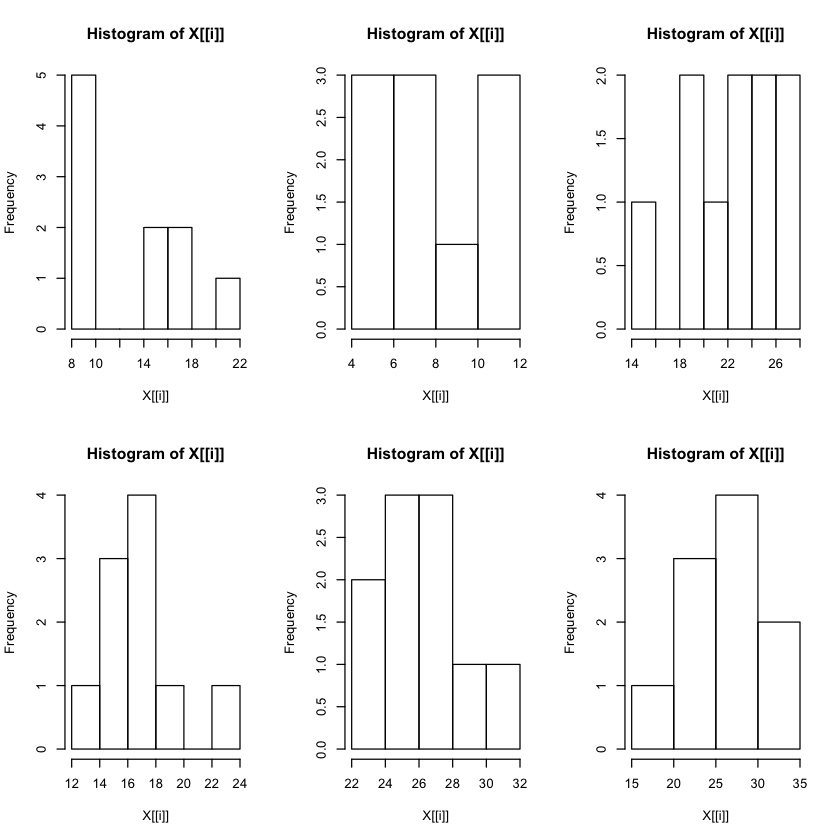

In [17]:
par(mfrow = c(2,3))
aggregate(len~., data = tg, FUN = hist)

0.5                                                                                                                                                                                                                                  
OJ 0.3754618, 1.5466353, 1.0004905, -0.6554235, 0.1225808, -0.1225808, -1.5466353, -1.0004905, 0.6554235, -0.3754618, 15.2000000, 21.5000000, 17.6000000, 9.7000000, 14.5000000, 10.0000000, 8.2000000, 9.4000000, 16.5000000, 9.7000000
VC -1.5466353, 1.5466353, 0.1225808, -0.6554235, -0.3754618, 0.3754618, 0.6554235, 1.0004905, -1.0004905, -0.1225808, 4.2000000, 11.5000000, 7.3000000, 5.8000000, 6.4000000, 10.0000000, 11.2000000, 11.2000000, 5.2000000, 7.0000000  
   1                                                                                                                                                                                                                                        
OJ -1.0004905, -0.1225808, 0.1225808, 1.0004905, -0.6554235, 0.3754618, 0.6554235, -0.3754618, -1.5466353, 1.5466353, 19.7000000, 23.3000000, 23.6000000, 26.4000000, 20.0000000, 25.2000000, 25.8000000, 21.2000000, 14.5000000, 27.3000000
VC -0.1225808, 0.1225808, -0.6554235, 0.3754618, 1.5466353, 0.6554235, -1.5466353, -1.0004905, 1.0004905, -0.3754618, 16.5000000, 16.5000000, 15.2000000, 17.3000000, 22.5000000, 17.3000000, 13.6000000, 14.5000000, 18.8000000, 15.5000000
   2                                                                                                                                                                                                                                        
OJ -0.1225808, 0.1225808, -1.5466353, -0.6554235, -0.3754618, 1.5466353, 0.3754618, 0.6554235, 1.0004905, -1.0004905, 25.5000000, 26.4000000, 22.4000000, 24.5000000, 24.8000000, 30.9000000, 26.4000000, 27.3000000, 29.4000000, 23.0000000
VC -0.3754618, -1.5466353, 1.5466353, -0.1225808, 0.1225808, 1.0004905, 0.3754618, -1.0004905, -0.6554235, 0.6554235, 23.6000000, 18.5000000, 33.9000000, 25.5000000, 26.4000000, 32.5000000, 26.7000000, 21.5000000, 23.3000000, 29.5000000

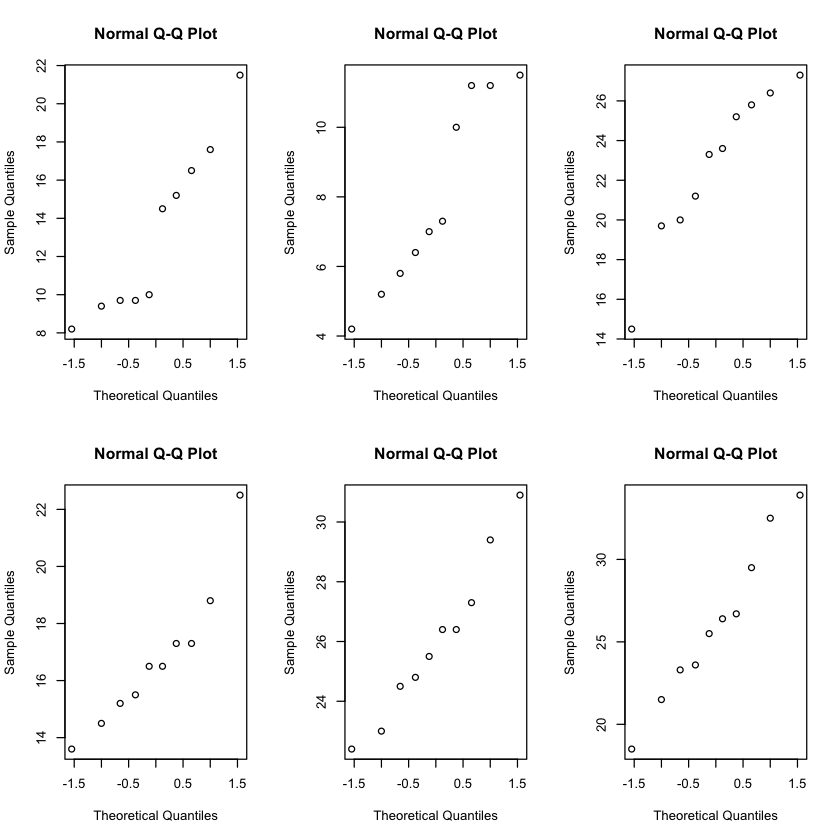

In [18]:
par(mfrow = c(2,3))
tapply(tg$len,
       INDEX = list(tg$supp, tg$dose),
       FUN = qqnorm)

supp: OJ
dose: 0.5
$x
 [1]  0.3754618  1.5466353  1.0004905 -0.6554235  0.1225808 -0.1225808
 [7] -1.5466353 -1.0004905  0.6554235 -0.3754618

$y
 [1] 15.2 21.5 17.6  9.7 14.5 10.0  8.2  9.4 16.5  9.7

------------------------------------------------------------ 
supp: VC
dose: 0.5
$x
 [1] -1.5466353  1.5466353  0.1225808 -0.6554235 -0.3754618  0.3754618
 [7]  0.6554235  1.0004905 -1.0004905 -0.1225808

$y
 [1]  4.2 11.5  7.3  5.8  6.4 10.0 11.2 11.2  5.2  7.0

------------------------------------------------------------ 
supp: OJ
dose: 1
$x
 [1] -1.0004905 -0.1225808  0.1225808  1.0004905 -0.6554235  0.3754618
 [7]  0.6554235 -0.3754618 -1.5466353  1.5466353

$y
 [1] 19.7 23.3 23.6 26.4 20.0 25.2 25.8 21.2 14.5 27.3

------------------------------------------------------------ 
supp: VC
dose: 1
$x
 [1] -0.1225808  0.1225808 -0.6554235  0.3754618  1.5466353  0.6554235
 [7] -1.5466353 -1.0004905  1.0004905 -0.3754618

$y
 [1] 16.5 16.5 15.2 17.3 22.5 17.3 13.6 14.5 18.8 15.5

----------

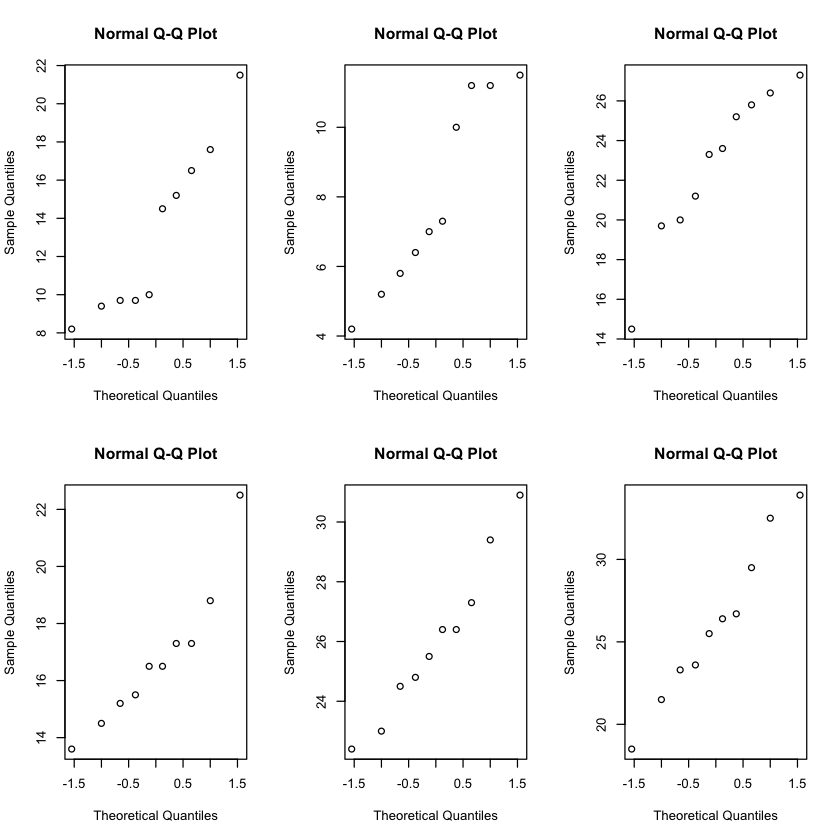

In [19]:
par(mfrow = c(2,3))
by(tg$len,
   INDICES = list(supp = tg$supp, dose = tg$dose),
   FUN = qqnorm)

## 7.4 For two quantitative variables
### 7.4.1 Numerical representation
        - Covariance
        - Correlation

##### Examine whether the following variables are correlated
- <b>mpg</b> --- miles per gallon, fuel economy
- <b>cyl</b> --- no. of cylinders, e.g. L4, V6, engine structure
- <b>dis</b> --- displacement, e.g. 2.0T, 2.5L, engine size
- <b>hp</b> --- horsepower, engine power

In [20]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [21]:
cov(mtcars[, c("mpg", "cyl", "disp", "hp")])

,mpg,cyl,disp,hp
mpg,36.324103,-9.172379,-633.0972,-320.7321
cyl,-9.172379,3.189516,199.6603,101.9315
disp,-633.097208,199.660282,15360.7998,6721.1587
hp,-320.732056,101.931452,6721.1587,4700.8669


In [22]:
cor(mtcars[, c("mpg", "cyl", "disp", "hp")])

,mpg,cyl,disp,hp
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684
cyl,-0.8521620,1.0000000,0.9020329,0.8324475
disp,-0.8475514,0.9020329,1.0000000,0.7909486
hp,-0.7761684,0.8324475,0.7909486,1.0000000


### 7.4.2 Graphical representation

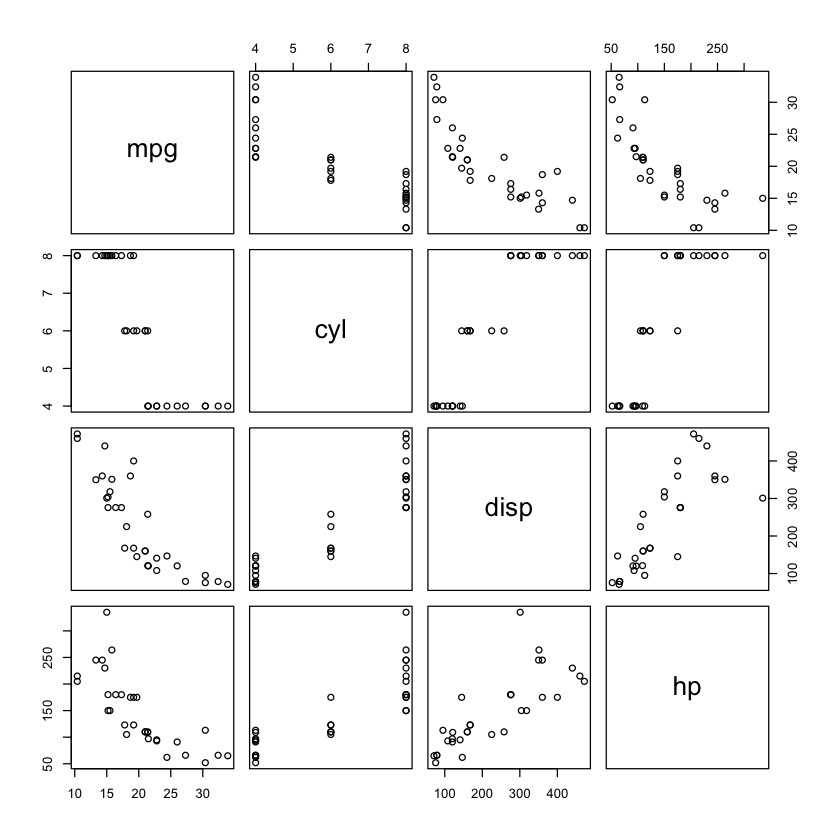

In [23]:
plot(mtcars[, c("mpg", "cyl", "disp", "hp")])
# See how powerful the plot function is.

### Exercise!
As epidemiologists and public health specialists, we should not use statistical softwares packages and functions as black boxes.

<b>We need to understand the theories behind!!!</b>

##### 1. Perform the calculation of sample covariance $cov(mpg, disp)$ from scratch

$$Cov(x,y)=\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})$$


In [24]:
cov(mtcars$mpg, mtcars$disp)

[1] -633.0972

##### 2. Reproduce the <b>qqnorm( )</b> plot using <b>plot( )</b>
If you understand the Q-Q plot, the main problem is - what are the quantiles of the 60 sample points?
1. $1/60^{th}$, $2/60^{th},\dots, 60/60^{th}$?
    - Does the 100% quantile of standard normal distribution exist?
    
2. $0/60^{th}$, $2/60^{th},\dots, 59/60^{th}$?
    - Does the 0% quantile of standard normal distribution exist?
    
3. Something else?

List of 2
 $ x: num [1:60] -2.394 -0.701 -1.331 -1.732 -1.569 ...
 $ y: num [1:60] 4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...


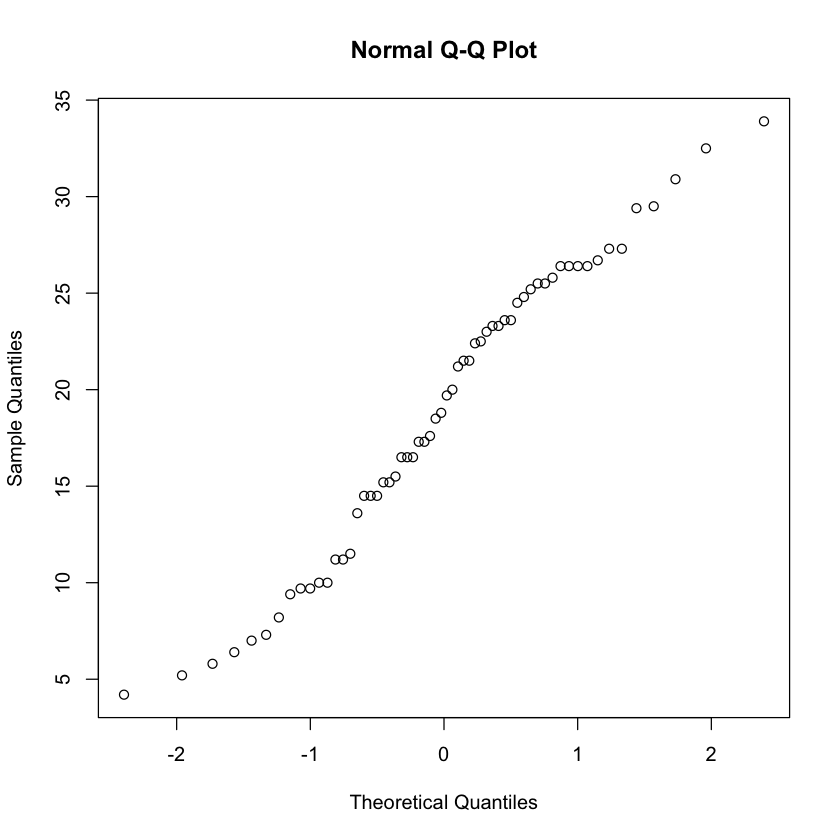

In [25]:
str(qqnorm(tg$len))